<a href="https://colab.research.google.com/github/ratulb/pytorch/blob/main/sklearn_datasets_make_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

****This notebook implements a numpy based linear regression based on one variable****

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


****Generate data points and visualize****

Coefficients: [87.73730719  0.        ]


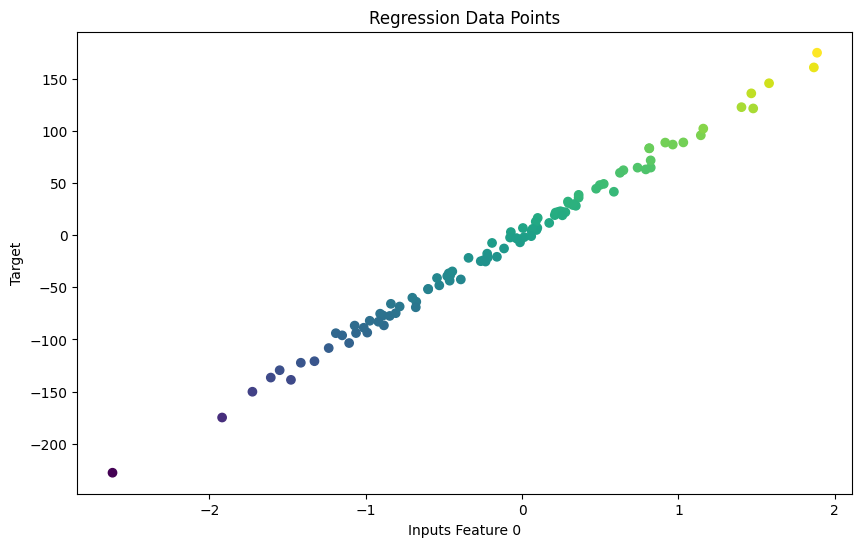

In [102]:
np.random.seed(0)
inputs, targets, coef = make_regression(n_samples=100, n_features=2, n_informative=1, coef=True, noise=5, random_state=42)
print(f"Coefficients: {coef}")
plt.figure(figsize=(10, 6))
plt.title("Regression Data Points")
plt.xlabel("Inputs Feature 0")
plt.ylabel("Target")
plt.scatter(inputs[:, 0], targets, c=targets)
plt.show()


****Split the data points into train, validation and test sets****





---



In [ ]:

#80% of inputs for train and validation and rest 20% for tests
inputs_train_val, inputs_test, targets_train_val, targets_test = train_test_split(
    inputs, targets, test_size=0.2, random_state=42
)
#75% of inputs_train_val into training inputs and 25% for train validation
inputs_train, inputs_val, targets_train, targets_val = train_test_split(
    inputs_train_val, targets_train_val, test_size=0.25, random_state=42
)


In [ ]:
inputs_train = inputs_train[:,0].reshape(-1, 1)
targets_train = targets_train.reshape(-1, 1)



****Weights and biases****

In [ ]:
num_epochs = 10000
learning_rate = 0.00125
w = np.random.randn(1, 1)  # Initialize w as a scalar
b = np.random.randn(1)  # Initialize b as a scalar

print(w)
print(b)


In [ ]:
for epoch in range(num_epochs):
    y_preds = inputs_train.dot(w) + b  # Use dot product for predictions
    # Error
    error = targets_train - y_preds
    loss = (error ** 2).mean()
    if (epoch + 1) % 100 == 0:
        print(f"Epoch: {epoch + 1}, Loss: {loss}")

    w_grad = -(2 * error * inputs_train).mean(axis=0)  # Calculate gradient for w
    b_grad = -(2 * error).mean()  # Calculate gradient for b
    w = w - learning_rate * w_grad  # Update w
    b = b - learning_rate * b_grad  # Update b


**Very that weights/bias calculated also agree with returned coeffient and that we obtain from sklearn**

In [ ]:
print(w)
print(b) # the calculated bias is negligible. This is expected as returned coef is 0 becuase we set n_informative=1 while getting the data
print(coef)

linr = LinearRegression()
linr.fit(inputs_train, targets_train)
print("\nWeights and bias from sklearn\n")
print(linr.intercept_, linr.coef_[0])